In [1]:
#Import libraries
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import  TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:

#Scrapping the tweets - Create a list to append tweet data
tweets_list = []
maxTweets = 5000

#Using TwitterSearchScraper to scrape data and append tweets to list 
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('nft since:2022-01-01 until:{today}').get_items()):
    if i == maxTweets:
        break
    tweets_list.append([tweet.rawContent])

#Creating a dataframe from the tweets list above

tweets_to_df = pd.DataFrame(tweets_list, columns=["Tweets"])

tweets_to_df.head() #list first five tweets


,Tweets
0,GM! Less than 90 minutes until today's Twitter...
1,@multivrsstudios Been saying it since day 1 of...
2,@KneeOhDaWon @LifesAJoke_NFT @AudioMaticNFTs @...
3,This mint will end today!\n\nAnother version w...
4,"@CryptoPilgrim1 Maybe someday.Until today, the..."


In [3]:
#clean the tweets with a function

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #remove @mentions
    text = re.sub('#', '', text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+', '',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ', text)
    return text

In [4]:
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original theets with cleaned tweets

,Tweets,cleanedTweets
0,GM! Less than 90 minutes until today's Twitter...,GM! Less than 90 minutes until today's Twitter...
1,@multivrsstudios Been saying it since day 1 of...,Been saying it since day 1 of 1. Until today ...
2,@KneeOhDaWon @LifesAJoke_NFT @AudioMaticNFTs @...,It didn’t get here until today beca...
3,This mint will end today!\n\nAnother version w...,This mint will end today! Another version wil...
4,"@CryptoPilgrim1 Maybe someday.Until today, the...","Maybe someday.Until today, the legal system d..."


In [5]:
#save results in .csv file
tweets_to_df.to_csv('tweets_ChatGPT.csv') #write dataframe into csv file
savedTweets = pd.read_csv('../Sentiment_Data/tweets_ChatGPT.csv', index_col=0) #read csv file
savedTweets.shape
savedTweets

,Tweets,cleanedTweets
0,GM! Less than 90 minutes until today's Twitter...,GM! Less than 90 minutes until today's Twitter...
1,@multivrsstudios Been saying it since day 1 of...,Been saying it since day 1 of 1. Until today ...
2,@KneeOhDaWon @LifesAJoke_NFT @AudioMaticNFTs @...,It didn’t get here until today beca...
3,This mint will end today!\n\nAnother version w...,This mint will end today! Another version wil...
4,"@CryptoPilgrim1 Maybe someday.Until today, the...","Maybe someday.Until today, the legal system d..."
...,...,...
1065,Received my first Bid on my 1/1 #NFT Auction @...,Received my first Bid on my 1/1 NFT Auction ...
1066,Square Enix: released a game two decades ago a...,Square Enix: released a game two decades ago a...
1067,Check out my newly purchased NFT on OpenSea! \...,Check out my newly purchased NFT on OpenSea! ...
1068,"@ProjectGalaxyHQ I have traded more than $1,00...","I have traded more than $1,000 in hashflow, w..."


In [6]:
#Using library Textblob to detect the subjectivity or polarity 
#Get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets columns

,cleanedTweets,Subjectivity,Polarity
0,GM! Less than 90 minutes until today's Twitter...,0.066667,-0.208333
1,Been saying it since day 1 of 1. Until today ...,0.394444,0.152778
2,It didn’t get here until today beca...,0.393939,0.193182
3,This mint will end today! Another version wil...,0.000000,0.000000
4,"Maybe someday.Until today, the legal system d...",0.400000,0.291667


In [7]:
#Create a function to check negative, neutral and positive analysis.

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)
savedTweets.drop('Tweets', axis=1).head()

,cleanedTweets,Subjectivity,Polarity,Analysis
0,GM! Less than 90 minutes until today's Twitter...,0.066667,-0.208333,Negative
1,Been saying it since day 1 of 1. Until today ...,0.394444,0.152778,Positive
2,It didn’t get here until today beca...,0.393939,0.193182,Positive
3,This mint will end today! Another version wil...,0.000000,0.000000,Neutral
4,"Maybe someday.Until today, the legal system d...",0.400000,0.291667,Positive


In [8]:
savedTweets[savedTweets['Analysis']=='Positive']

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
1,@multivrsstudios Been saying it since day 1 of...,Been saying it since day 1 of 1. Until today ...,0.394444,0.152778,Positive
2,@KneeOhDaWon @LifesAJoke_NFT @AudioMaticNFTs @...,It didn’t get here until today beca...,0.393939,0.193182,Positive
4,"@CryptoPilgrim1 Maybe someday.Until today, the...","Maybe someday.Until today, the legal system d...",0.400000,0.291667,Positive
7,@ManDogTwoCats @kzKallisti been hearing this k...,been hearing this kind of tether FUD for 6 y...,0.900000,0.600000,Positive
8,"@NFTMillionaire (After 16 months, 7 days per w...","(After 16 months, 7 days per week, and mintin...",0.398766,0.172987,Positive
...,...,...,...,...,...
1063,with all my learning about crypto and NFTs I h...,with all my learning about crypto and NFTs I h...,0.250000,0.250000,Positive
1065,Received my first Bid on my 1/1 #NFT Auction @...,Received my first Bid on my 1/1 NFT Auction ...,0.325397,0.083333,Positive
1067,Check out my newly purchased NFT on OpenSea! \...,Check out my newly purchased NFT on OpenSea! ...,0.484848,0.273485,Positive
1068,"@ProjectGalaxyHQ I have traded more than $1,00...","I have traded more than $1,000 in hashflow, w...",0.533333,0.233333,Positive


In [9]:

#shows the counts of tweets'polarity
savedTweets['Analysis'].value_counts()

Positive    632
Neutral     254
Negative    184
Name: Analysis, dtype: int64

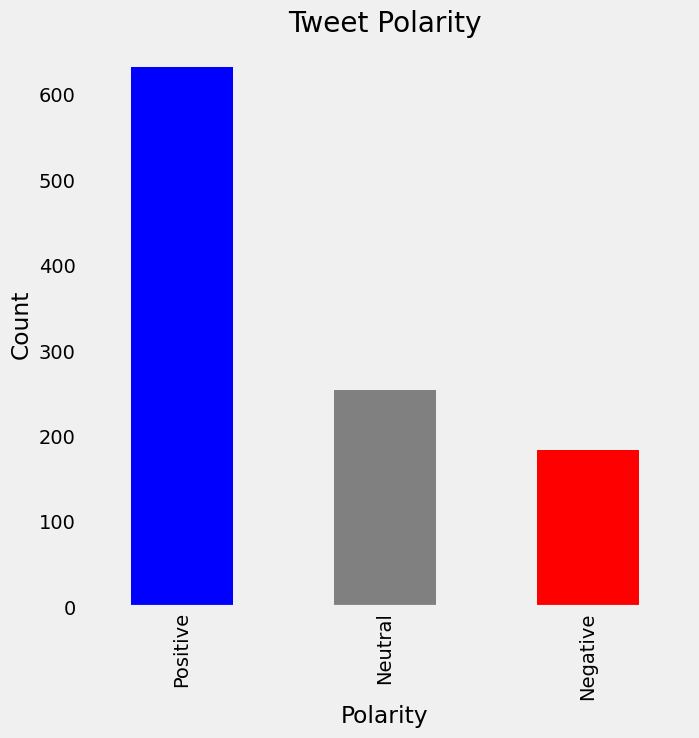

In [10]:
#I decide to plot a bar graph and pie chart for each polarity, you can choose any one of you preferences.
#Bar graph
fig = plt.figure(figsize=(7,7))
color = ['blue','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar', color = color)
plt.title('Tweet Polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of Polarity')

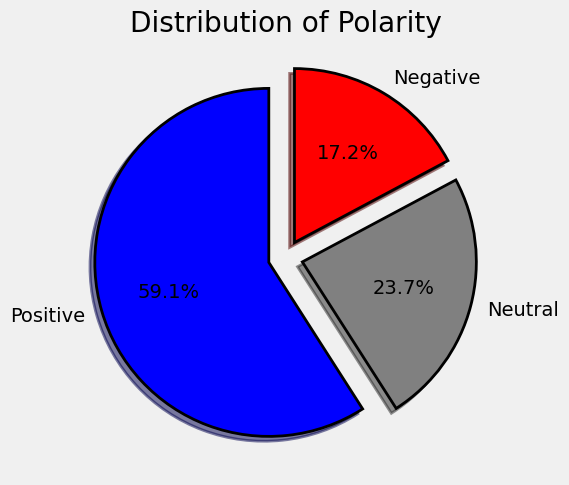

In [11]:

#Pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(5,7))
colors = ('blue', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Polarity')

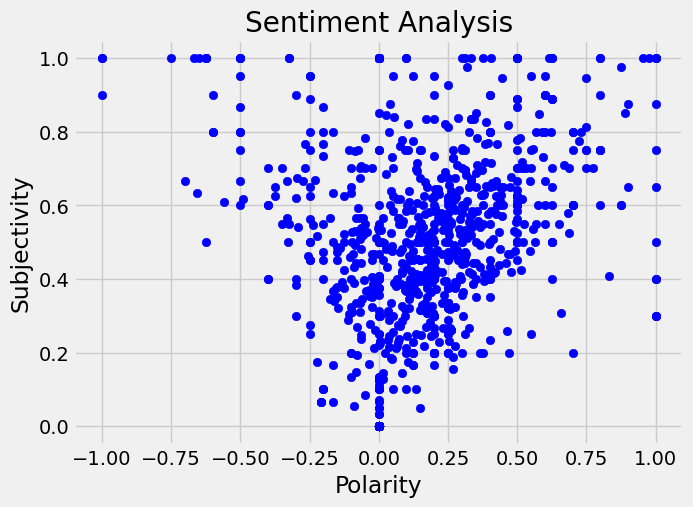

In [12]:
#Plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(7,5))
for i in range (0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
savedTweets.shape[0]#shows total rows of tweets

1070

In [14]:
#Get the percentage of positive tweets
nTweets = savedTweets[savedTweets['Analysis']=='Positive']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/savedTweets.shape[0]) *100,1)
print('Percentage of positive tweets: {0}%'.format(percentage))

Percentage of positive tweets: 59.1%


In [15]:
#get the percentage of negative tweets
nTweets = savedTweets[savedTweets['Analysis']=='Negative']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/savedTweets.shape[0]) *100,1)
print('Percentage of negative tweets: {0}%'.format(percentage))

Percentage of negative tweets: 17.2%
